## Load Libraries

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\BX-Book-Ratings.csv
dataset\BX-Books.csv
dataset\BX-Users.csv


## Load Data 

Mengimpor file CSV (Books, Book-Rating, Users) ke Python menggunakan read_csv()

In [6]:
books = pd.read_csv('dataset/BX-Books.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [7]:
ratings = pd.read_csv('dataset/BX-Book-Ratings.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')

In [8]:
users = pd.read_csv('dataset/BX-Users.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')

menghitung ukuran suatu data (baris dan kolom) menggunakan fungsi shape

In [9]:
books.shape

(271360, 8)

In [10]:
ratings.shape

(1149780, 3)

In [11]:
users.shape

(278858, 3)

mengetahui kolom-kolom yang terdapat pada data.CSV menggunakan fungsi collumns

In [12]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [13]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [14]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

menampilkan data pertama pada setiap data .CSV

In [15]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [16]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [18]:
#Satukan tabel 'user', 'books', dan 'book_ratings'
data = pd.merge(ratings, users, on='User-ID', how='inner')

In [19]:
data = pd.merge(data, books, on='ISBN', how='inner')

In [20]:
#Kolom setelah data .CSV digabungkan
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [21]:
# ukuran dataset
print('Ukuran dataset adalah: ', data.memory_usage().sum() / 1024**2, ' MB')

Ukuran dataset adalah:  102.270263671875  MB


## Exploratory Data Analysis

### Data

In [22]:
data.shape

(1031136, 12)

In [23]:
data.head(10)

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,"st. louis, missouri, usa",45.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
6,28266,034545104X,0,"portland, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,"springfield, missouri, usa",24.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
8,39002,034545104X,0,"san jose, ,",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
9,50403,034545104X,9,"conway, arkansas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [23]:
# Mengetahui gambaran data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
User-ID                1031136 non-null int64
ISBN                   1031136 non-null object
Book-Rating            1031136 non-null int64
Location               1031136 non-null object
Age                    753301 non-null float64
Book-Title             1031136 non-null object
Book-Author            1031135 non-null object
Year-Of-Publication    1031136 non-null object
Publisher              1031134 non-null object
Image-URL-S            1031136 non-null object
Image-URL-M            1031136 non-null object
Image-URL-L            1031132 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [24]:
# Missing Data
print('Data yang hilang atau missing data [%]')
round(data.isnull().sum() / len(data) * 100, 4)

Data yang hilang atau missing data [%]


User-ID                 0.0000
ISBN                    0.0000
Book-Rating             0.0000
Location                0.0000
Age                    26.9446
Book-Title              0.0000
Book-Author             0.0001
Year-Of-Publication     0.0000
Publisher               0.0002
Image-URL-S             0.0000
Image-URL-M             0.0000
Image-URL-L             0.0004
dtype: float64

#### Tabel "Ratings"

Sebagian besar buku memiliki rating nol.
Skala rating sebenarnya dari 1 hingga 10 (rating 'eksplisit'), dan 0 menunjukkan rating 'implisit' 
Rating implisit mewakili interaksi (mungkin positif atau negatif) antara user dan item. 
Untuk langkah pemodelan, hanya akan melihat rating eksplisit, sehingga rating 0 akan dihapus.
Dengan menghapus rating implisit, ukuran sampel telah berkurang lebih dari setengah.

In [25]:
data['Book-Rating'] = data['Book-Rating'].replace(0, None)

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

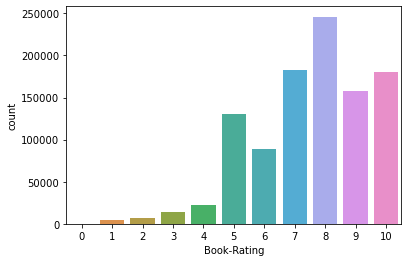

In [26]:
# Distribusi Rating Buku
sns.countplot(x='Book-Rating', data=data)

tampak bahwa skala rating buku adalah dari 1 hingga 10. 8 adalah rating yang paling sering diberikan user. User cenderung sedikit memberikan rating>5

In [27]:
#rata -rata buku
print('Rata-rata rating buku: ', round(data['Book-Rating'].mean(), 2))

Rata-rata rating buku:  7.55


In [28]:
country = data['Location'].apply(lambda row: str(row).split(',')[-1])
data.groupby(country)['Book-Rating'].count().sort_values(ascending=False).head(10)

Location
 usa               746466
 canada             93000
 united kingdom     33072
 germany            27657
                    24259
 australia          18238
 spain              14968
 n/a                11177
 france             10639
 portugal            6980
Name: Book-Rating, dtype: int64

#### Tabel "Users"

In [29]:
#Menghitung jumlah user
print('Jumlah pembaca buku: ',data['User-ID'].nunique())

Jumlah pembaca buku:  92106


In [30]:
#unique value di kolom age
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

<AxesSubplot:xlabel='Age'>

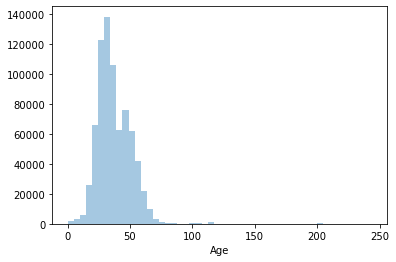

In [31]:
sns.distplot(data['Age'].dropna(), kde=False)

Rentang usia pada histogram adalah dari 0 hingga 244 tahun. Maka, perlu ditetapkan nilai usia dimulai dari 5 tahun - 100 tahun ke NaN agar lebih realistis

In [32]:
# Hitung jumlah outlier di Age
print('Jumlah outliers: ', sum(data['Age'] > 100))

Jumlah outliers:  2910


In [33]:
#rentang umur 5 tahun - 100 tahun
users.loc[(users.Age<5) | (users.Age>100), 'Age'] = np.nan

In [34]:
#unique value di kolom Age rentang umur 5-10 tahun
print(sorted(users.Age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


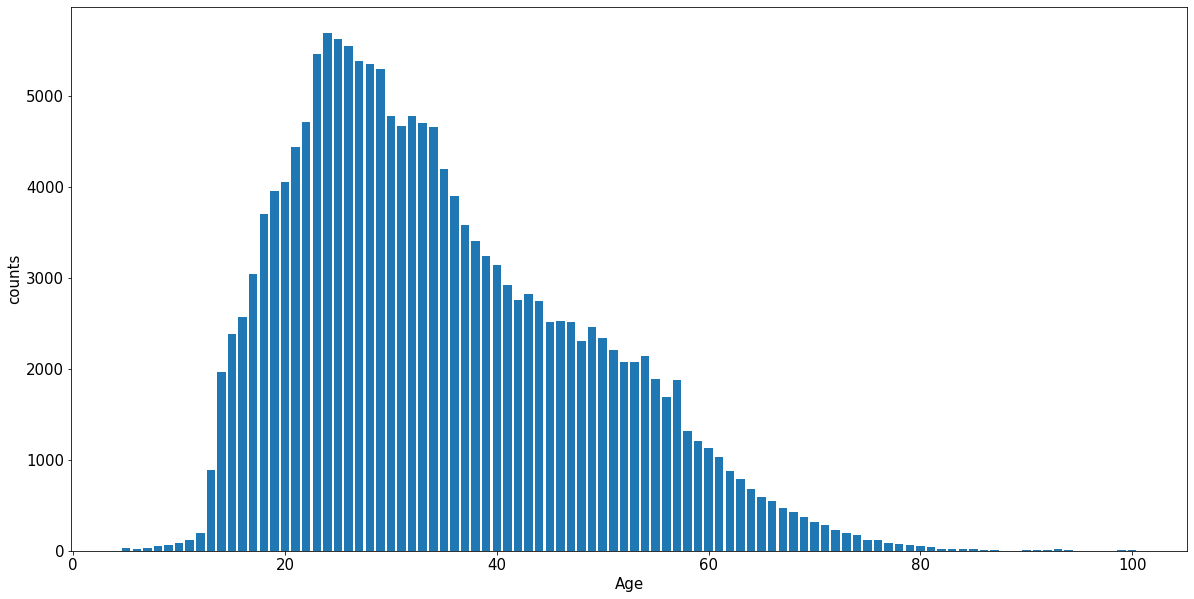

In [35]:
#Tampilan histogram Age
u = users.Age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

Dari histogram yang ditampilkan, terlihat bahwa sebagian besar user berusia akhir 20-an hingga awal 30-an

#### Tabel"Books"

In [36]:
#Hitung jumlah buku
print('Jumlah buku: ', data['ISBN'].nunique())

Jumlah buku:  270151


In [37]:
#Periksa apakah ada duplicated book
uniq_books = data['ISBN'].nunique()
all_books = data['ISBN'].count()
print(f'Jumlah buku yang unik: {uniq_books} | Jumlah semua buku: {all_books}')

Jumlah buku yang unik: 270151 | Jumlah semua buku: 1031136


In [38]:
#Publisher yang paling banyak di set data.
top_publishers = data["Publisher"].value_counts()[:10]
print(f'10 penerbit buku terbanyak :\n{top_publishers}')

10 penerbit buku terbanyak :
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: Publisher, dtype: int64


In [39]:
# Judul buku terbanyak dalam set data
top_titles = data["Book-Title"].value_counts()[:10]
print(f'10 judul buku terbanyak :\n{top_titles}')

10 judul buku terbanyak :
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: Book-Title, dtype: int64


## Featire Engineering 

### Ganti Tipe Data 

In [40]:
data['Book-Rating'] = data['Book-Rating'].replace(0, None)

In [41]:
#tipe data pada masing-masing kolom buku
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [42]:
# Ubah tipe data years menjadi float
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'], errors='coerce')

In [43]:
# Ganti semua years yang bernilai nol dengan Nan
data['Year-Of-Publication'].replace(0, np.nan, inplace=True)

In [44]:
#tipe data pada masing-masing kolom rating
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [45]:
#tipe data pada masing-masing kolom user
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

## Menangani outliers

In [46]:
data['Age'] = np.where(data['Age']>90, None, data['Age'])

## Menghitung nulls

In [47]:
#Fitur kategorikal
data[['Book-Author', 'Publisher']] = data[['Book-Author', 'Publisher']].fillna('Unknown')

In [48]:
# Cek Fitur Kategorikal
data[['Book-Author', 'Publisher']].isnull().sum()

Book-Author    0
Publisher      0
dtype: int64

In [49]:
# Umur
median = data["Age"].median()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size = is_null)
age_slice = data["Age"].copy()
age_slice[pd.isnull(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)

In [50]:
# Cek Umur
data['Age'].isnull().sum()

0

## Bersihkan Data

In [51]:
# Membersihkan ampersand formatting di penerbit
data["Publisher"] = data["Publisher"].str.replace('&amp', '&', regex=False)
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",43,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,5,"strafford, missouri, usa",34,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",40,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


## Ekstrak Fitur

In [52]:
data['Country'] = data['Location'].apply(lambda row: str(row).split(',')[-1])

In [53]:
# Drop data yang tidak relevan
data = data.drop('Location', axis=1)

In [54]:
data['Country'].head()

0     usa
1     usa
2     usa
3     usa
4     usa
Name: Country, dtype: object

## Prepare Dataset

In [55]:
df = data

In [56]:
# Relevant Score
df = df[df['Book-Rating'] >= 6]

In [57]:
# Cek
df.groupby('ISBN')['User-ID'].count().describe()

count    228991.000000
mean          3.728378
std          12.416496
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        1206.000000
Name: User-ID, dtype: float64

Filter data dengan groupby di panda

In [59]:
df = df.groupby('ISBN').filter(lambda x: len(x) >= 5)

In [60]:
df.groupby('User-ID')['ISBN'].count().describe()

count    66526.000000
mean         8.234104
std         50.644099
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       5841.000000
Name: ISBN, dtype: float64

In [61]:
df = df.groupby('User-ID').filter(lambda x: len(x) >= 5)

In [62]:
df.shape

(469087, 12)

In [63]:
data.nunique()

User-ID                 92106
ISBN                   270151
Book-Rating                11
Age                        89
Book-Title             241071
Book-Author            101588
Year-Of-Publication       115
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
Country                   288
dtype: int64

## Implementing Apriori Algorithm

In [103]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from apyori import apriori

In [104]:
data.head(10)

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Country,Populer
0,276725,034545104X,0,43,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,False
1,2313,034545104X,5,23,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,False
2,6543,034545104X,5,34,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,False
3,8680,034545104X,5,2,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,False
4,10314,034545104X,9,40,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,True
5,23768,034545104X,9,45,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,True
6,28266,034545104X,9,24,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,True
7,28523,034545104X,9,24,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,True
8,39002,034545104X,9,39,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,,True
9,50403,034545104X,9,46,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,True


In [105]:
#Menentukan buku dengan rating populer
data["Populer"] = data["Book-Rating"] > 5
#Menampilkan dataset
data[10:15]
data[data["User-ID"] == 1][:5]

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Country,Populer


In [106]:
#Menampilkan dataframe baru
data.head()

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Country,Populer
0,276725,034545104X,0,43,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,False
1,2313,034545104X,5,23,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,False
2,6543,034545104X,5,34,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,False
3,8680,034545104X,5,2,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,False
4,10314,034545104X,9,40,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa,True


In [107]:
#Membuat training set dari beberapa sampel data
ratings = data[data['User-ID'].isin(range(3000))]

In [108]:
#Membuat dataset dari rating populer
favorable_ratings = ratings[ratings["Populer"]]

In [109]:
#Mengelompokkan dataset oleh User-ID dan iterasi atas buku dari setiap kelompok
favorable_reviews_by_user = dict((k, frozenset(v.values)) for k, v in favorable_ratings.groupby("User-ID")["ISBN"])

In [110]:
#Menampilkan lima buku yang paling populer
num_favorable_by_book = ratings[["ISBN", "Populer"]].groupby("ISBN").sum()
num_favorable_by_book.sort_values(by="Populer", ascending=False).head()

,Populer
ISBN,
0316666343,10.0
0971880107,9.0
0142001740,8.0
0385504209,7.0
0452282152,7.0


In [111]:
#Menetapkan initial frequent itemset
frequent_itemsets = {}
min_support=5

In [112]:
#Membuat itemset buku dan menguji apakah itemset yang dibuat frequent dengan method frozenset
frequent_itemsets[1] = dict((frozenset((ISBN,)), row["Populer"])
                           for ISBN, row in num_favorable_by_book.iterrows()
                           if row["Populer"] > min_support)

print("Terdapat {} buku dengan lebih dari {} favorable reviews".format(len(frequent_itemsets[1]), min_support))

Terdapat 13 buku dengan lebih dari 5 favorable reviews


In [113]:
import sys
# Mengatur fungsi dan counting dictionary
from collections import defaultdict

def find_frequent_itemsets(favorable_reviews_by_user, k_1_itemsets, min_support):
    counts = defaultdict(int)

# Melakukan iterasi pada semua pengguna dan review
    for user, reviews in favorable_reviews_by_user.items():
# Melihat setiap itemset yang ditemukan sebelumnya 
         for itemset in k_1_itemsets:
            if itemset.issubset(reviews):
# Membuat superset dari pengguna yang tidak ada dalam itemset
                for other_reviewed_book in reviews - itemset:
                    current_superset = itemset | frozenset((other_reviewed_book,))
                    counts[current_superset] += 1
# menguji candidate itemset untuk mengakhiri fungsi
    return dict([(itemset, frequency) for itemset, frequency in counts.items()
                 if frequency >= min_support])
# Membuat frequent itemset dan menyimpan mereka di dalam dictionary sesuai dengan panjangnya
for k in range(2, 20):
    cur_frequent_itemsets = find_frequent_itemsets(favorable_reviews_by_user,
                                                  frequent_itemsets[k-1],
                                                  min_support)
# Memecah loop sebelumnya jika tidak menemukan frequent itemset yang baru
    if len(cur_frequent_itemsets)==0:
        print("Did not find any frequent itemsets of length {}".format(k))
        sys.stdout.flush()
        break
        
    else:
        print("I found {} frequent itemsets of length {}".format(len(cur_frequent_itemsets), k))
        frequent_itemsets[k] = cur_frequent_itemsets
del frequent_itemsets[1]

I found 3 frequent itemsets of length 2
Did not find any frequent itemsets of length 3


## Extracting Association Rules

In [114]:
# Menampilkan jumlah candidate rules berdasarkan frequent itemset 
candidate_rules = []
for itemsets_length, itemset_counts in frequent_itemsets.items():
    for itemset in itemset_counts.keys():
        for conclusion in itemset:
            premise = itemset - set((conclusion,))
            candidate_rules.append((premise, conclusion))
            
    print("Terdapat {} candidate rules".format(len(candidate_rules)))

Terdapat 6 candidate rules


In [115]:
#Menampilkan candidate Rules
print(candidate_rules[:5])

[(frozenset({'0316776963'}), '0316666343'), (frozenset({'0316666343'}), '0316776963'), (frozenset({'0452282152'}), '0316776963'), (frozenset({'0316776963'}), '0452282152'), (frozenset({'0142001740'}), '0060392452')]


In [116]:
#Menghitung confidence setiap candidate rule
correct_counts = defaultdict(int)
incorrect_counts = defaultdict(int)

In [117]:
# Iterasi user dan favorable review setiap candidate
for user, reviews in favorable_reviews_by_user.items():
    for candidate_rule in candidate_rules:
        premise, conclusion = candidate_rule
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule] += 1
            else:
                incorrect_counts[candidate_rule] += 1
                
# Menghitung rule confidence
rule_confidence = { candidate_rule: correct_counts[candidate_rule] / 
               float(correct_counts[candidate_rule] + incorrect_counts[candidate_rule])
               for candidate_rule in candidate_rules}

In [99]:
# Menampilkan 5 rule teratas
from operator import itemgetter

sorted_confidence = sorted(rule_confidence.items(), key=itemgetter(1), reverse=True)
for index in range(5):
    print("Rule #{0}".format(index + 1 ))
    (premise, conclusion) = sorted_confidence[index][0]
    print("Rule: If a person recommends {0} they will also recommend {1}".format(premise, conclusion))
    print(" - Confidence: {0:.3f}\n".format(rule_confidence[(premise, conclusion)]))

Rule #1
Rule: If a person recommends frozenset({'0316776963'}) they will also recommend 0316666343
 - Confidence: 0.500

Rule #2
Rule: If a person recommends frozenset({'0316776963'}) they will also recommend 0452282152
 - Confidence: 0.500

Rule #3
Rule: If a person recommends frozenset({'0060392452'}) they will also recommend 0142001740
 - Confidence: 0.500

Rule #4
Rule: If a person recommends frozenset({'0452282152'}) they will also recommend 0316776963
 - Confidence: 0.429

Rule #5
Rule: If a person recommends frozenset({'0142001740'}) they will also recommend 0060392452
 - Confidence: 0.375



In [118]:
# Menampilkan 5 rule teratas berdasarkan judul buku
def get_book_title(ISBN):
    title_object = data[data["ISBN"] == ISBN]["Book-Title"]
    title = title_object.values[0]
    return title

for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    premise_names = ", ".join(get_book_title(idx) for idx in premise)
    conclusion_name = get_book_title(conclusion)
    print("Rule: If a person recommends {0}, they will also recommend book with ISBN :{1}".format(premise_names, conclusion))
    print(" - Confidence: {0:.3f}".format(rule_confidence[(premise, conclusion)]))
    print("")

Rule #1
Rule: If a person recommends Me Talk Pretty One Day, they will also recommend book with ISBN :0316666343
 - Confidence: 0.500

Rule #2
Rule: If a person recommends Me Talk Pretty One Day, they will also recommend book with ISBN :0452282152
 - Confidence: 0.500

Rule #3
Rule: If a person recommends Stupid White Men ...and Other Sorry Excuses for the State of the Nation!, they will also recommend book with ISBN :0142001740
 - Confidence: 0.500

Rule #4
Rule: If a person recommends Girl with a Pearl Earring, they will also recommend book with ISBN :0316776963
 - Confidence: 0.429

Rule #5
Rule: If a person recommends The Secret Life of Bees, they will also recommend book with ISBN :0060392452
 - Confidence: 0.375

